# Analiza voznikov Formule 1

Podatki analizirani v tem zvezku so pridobljeni s spletne strani https://www.f1-fansite.com/f1-results/all-time-f1-driver-rankings/ in s še nekaj drugih strani znotraj te iste spletne strani.

In [1]:
import pandas as pd


pd.set_option("display.max_rows", 10)


%matplotlib inline


VOZNIKI = pd.read_csv("F1_podatki/F1_drivers.csv", index_col="ime")
VOZNIKI_DODATNO = pd.read_csv("F1_podatki/F1_drivers_dodatno.csv", index_col="ime")

Za vsakega izmed voznikov, ki je kadarkoli tekmoval v Formuli 1 sem izluščil nekaj podatkov kot so ime, država s katere dirkač prihaja, zmage, naslovi in še kaj, kot je prikazano v spodnji tabeli.<br>
__Nastopi__, __zmage__, __druga__, __tretja mesta__ in __stopničke__ se navezujejo na posamezne dirke medtem, ko __naslov__ pomeni, da je bil dirkač od konkurence boljši skozi celotno sezono.
__Najhitrejši krog__ dirkač doseže, ko odpelje najhitrejši krog na posamezni dirki.
Pod stolpcem __točke__ pa je število vseh točk, ki jih je dirkač dosegel skozi svojo kariero (Na dirko lahko posameznik doseže od 0 do 26 točk).


In [2]:
VOZNIKI

,država,nastopi,zmage,druga mesta,tretja mesta,stopničke,začne s prve pozicije,najhitrejši krog,naslovi,točke,dodatni url
ime,,,,,,,,,,,
Lewis Hamilton,United Kingdom,346,105,56,40,201,105,67,7,4789,https://www.f1-fansite.com/f1-drivers/lewis-ha...
Sebastian Vettel,Germany,299,53,36,33,122,57,38,4,3098,https://www.f1-fansite.com/f1-drivers/sebastia...
Max Verstappen,Netherlands,199,61,30,16,107,40,32,3,2863,https://www.f1-fansite.com/f1-drivers/max-vers...
Fernando Alonso,Spain,391,32,40,34,106,22,26,2,2316,https://www.f1-fansite.com/f1-drivers/fernando...
Kimi Räikkönen,Finland,349,21,37,45,103,18,46,1,1873,https://www.f1-fansite.com/f1-drivers/kimi-rai...
...,...,...,...,...,...,...,...,...,...,...,...
Toranosuke Takagi,Japan,32,0,0,0,0,0,0,0,0,https://www.f1-fansite.com/f1-drivers/toranosu...
Brett Lunger,United States,34,0,0,0,0,0,0,0,0,https://www.f1-fansite.com/f1-drivers/brett-lu...
Max Chilton,United Kingdom,35,0,0,0,0,0,0,0,0,https://www.f1-fansite.com/f1-drivers/max-chil...


Spodnji graf prikazuje število voznikov, ki prihajajo iz posamezne države. Vidimo, da je do sedaj bilo največ dirkačev iz Združenega Kraljestva in Združenih Držav Amerike, nobenega pa iz Slovenije.

<Axes: xlabel='država'>

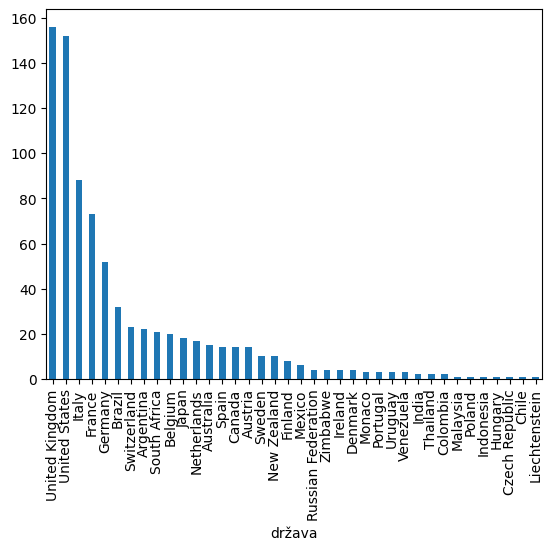

In [3]:

stevilo_voznikov_po_drzavah = VOZNIKI.groupby('država').size()
stevilo_voznikov_po_drzavah.sort_values(inplace= True,ascending=False)
stevilo_voznikov_po_drzavah.plot.bar()

Kako pa nacionalnost posameznikov vpliva na uspešnost le teh? Spodnji graf prikazuje število stopničk, ki so jih dosegli dirkači s posamezne države.<br>
 Združeno Kraljestvo ima le teh na svojem računu največ, kar bi bilo smiselno, glede na število njihovi voznikov, medetm, ko imajo ZDA stopničk veliko manj. 

<Axes: xlabel='država'>

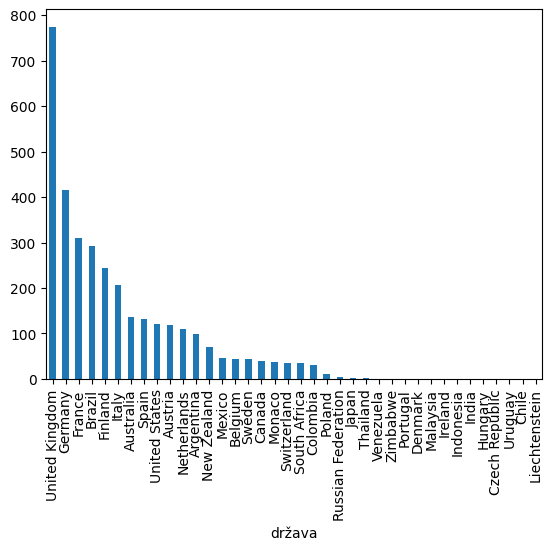

In [4]:
zmage_po_drzavah1 = VOZNIKI.groupby(by="država")["stopničke"].sum()
zmage_po_drzavah1.sort_values(inplace= True,ascending=False)
zmage_po_drzavah1.plot.bar()

Ker v zgornjem grafu nismo upoštevali števila voznikov posamezne države, spodnji graf prikazuje koliko stopničk ima dirkač vsake države v povprečju.<br>
 Opazimo, da so v povprečju daleč najboljši finski dirkači. 

<Axes: xlabel='država'>

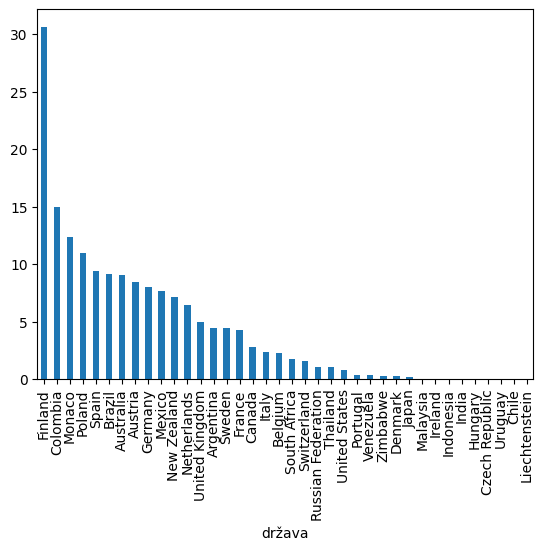

In [5]:
zmage_po_drzavah2 = VOZNIKI.groupby(by="država")["stopničke"].mean()
zmage_po_drzavah2.sort_values(inplace= True,ascending=False)
zmage_po_drzavah2.plot.bar()

Kdo pa so največji osmoljenci Formule 1?<br>
 Dirkač z največ dirkami brez zmage je Nico Hülkenberg iz Nemčije, ki je brez zmage že kar 218 dirk. To pomeni, da je Nico brez zmage že  10 sezon, glede na to, da se v vsaki sezoni odpelje med 20 in 25 dirk.

In [6]:
filter_brez_zmage = (VOZNIKI['zmage'] == 0) 
najvec_nastopov_brez_zmage = VOZNIKI[filter_brez_zmage].sort_values("nastopi", ascending=False)
najvec_nastopov_brez_zmage[['država', 'nastopi', 'zmage']].head(10)

,država,nastopi,zmage
ime,,,
Nico Hülkenberg,Germany,218,0
Andrea de Cesaris,Italy,208,0
Nick Heidfeld,Germany,181,0
Romain Grosjean,France,179,0
Kevin Magnussen,Denmark,177,0
Martin Brundle,United Kingdom,158,0
Lance Stroll,Canada,157,0
Derek Warwick,United Kingdom,147,0
Jean-Pierre Jarier,France,135,0


Pogledali smo že, kateri vozniki imajo oz. so imeli največjo smolo. Kaj pa tisti, ki ne morejo zgubiti? Zmage posameznikov primerjajmo s številom njihovih nastopov tako, da dobimo število dirk med posamičnimi zmagami.<br>
S tega vidika je najuspešnejši Lee Wallard, ki je zmagal vsako drugo dirko, vendar nam to ne pove dosti, kajti odvozil je le dve dirki. Najbolj impresivna sta zato dirkača Lewis Hamilton in Michael Schumacher, ki sta zmagala približno vsako tretjo dirko in imata več kot 300 nastopov.

In [7]:
filter_ima_zmago = (VOZNIKI["zmage"] != 0)
ima_zmago = VOZNIKI[filter_ima_zmago].copy()
ima_zmago["Dirke med zmagami"] = ima_zmago["nastopi"] / ima_zmago["zmage"]
ima_zmago.sort_values("Dirke med zmagami")[['nastopi', 'zmage', 'Dirke med zmagami']].head(10)

,nastopi,zmage,Dirke med zmagami
ime,,,
Lee Wallard,2,1,2.000000
Juan Manuel Fangio,51,24,2.125000
Alberto Ascari,32,13,2.461538
Bill Vukovich,5,2,2.500000
Jim Clark,72,25,2.880000
Max Verstappen,199,61,3.262295
Lewis Hamilton,346,105,3.295238
Michael Schumacher,307,91,3.373626
Jackie Stewart,100,27,3.703704


Na spodnjem razsevnem diagramu lepo vidimo dirkače, ki so enkratni zmagovalci. Te so namreč na diagonali diagrama, medtem, ko tiste najbolj uspešne lahko najdemo v desnem spodnjem kotu diagrama.

<Axes: xlabel='nastopi', ylabel='Dirke med zmagami'>

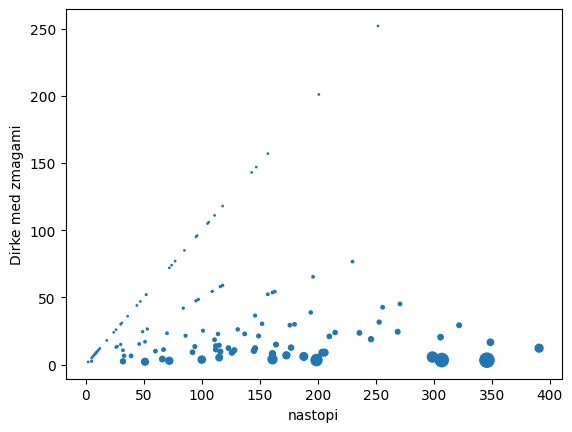

In [8]:
ima_zmago.plot.scatter('nastopi', 'Dirke med zmagami', "zmage")

Dirkač na dirko lahko osvoji od 0 do 26 točk, glede na njegovo končno pozicijo. Uspešnejši kot je, več točk dobi. Naslov prvaka Formule 1 osvoji tisti dirkač, ki ima na koncu sezone največ točk.<br>
Vidimo, da se povprečno število točk, ki jih dirkači osvojijo na dirko, odraža tudi v številu naslovov prvaka.

In [9]:
VOZNIKI['povp. točke na dirko'] = VOZNIKI['točke'] / VOZNIKI['nastopi']
VOZNIKI.sort_values("povp. točke na dirko", ascending=False)[['nastopi', 'točke', 'povp. točke na dirko', 'naslovi']].head(10)

,nastopi,točke,povp. točke na dirko,naslovi
ime,,,,
Max Verstappen,199,2863,14.386935,3
Lewis Hamilton,346,4789,13.841040,7
Sebastian Vettel,299,3098,10.361204,4
Charles Leclerc,137,1247,9.102190,0
Nico Rosberg,206,1594,7.737864,1
Valtteri Bottas,236,1797,7.614407,0
Oscar Piastri,36,264,7.333333,0
Lando Norris,118,832,7.050847,0
George Amick,1,6,6.000000,0


Spodnji graf primerja povprečno število povprečnih točk na dirko s številom nastopov.<br>
Opazimo, da graf postopoma narašča. To je smiselno, saj si ekipe želijo imeti tiste voznike, ki osvojijo največ točk. Posledično bodo te vozniki odpeljeli tudi največ dirk.

<Axes: xlabel='nastopi'>

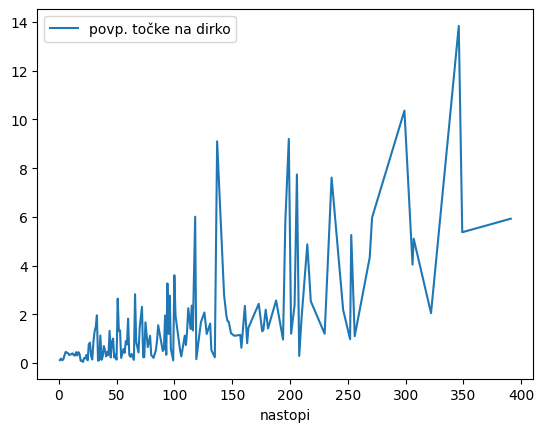

In [10]:
VOZNIKI.groupby(by="nastopi").agg({"povp. točke na dirko":"mean"}).plot()

Oglejmo si še nekaj dodatnih podatkov najuspešnejših dirkačev. Število le teh ste predhodno omejili z izbiro minimalnega števila točk, ki jih mora dirkač imeti. Če s svojo izbiro niste zadovoljni lahko ponovno zaženete datoteko MAIN.py in vnesete nov kriterij, vendar potem ne pozabite ponovno zagnati tudi zvezka analiza_voznikov.ipynb. Moja analiza bo narejena na podlagi priporočene spodnje meje 500 točk. V primeru, da ste izbrali različno spodnjo mejo se rezultati lahko razlikujejo.<br>
Dodatno pridobljeni podatki so __višina__, __starost__, __povprečno štartno mesto__, __povprečno končno mesto__ in __prevoženi krogi__, kjer se povprečno štartno in končno mesto ter prevoženi krogi navezujejo na celotno kariero.

In [11]:

VOZNIKI_DODATNO[["nastopi", "točke"]] = VOZNIKI[["nastopi", "točke"]]
VOZNIKI_DODATNO["povp. točke na dirko"] = VOZNIKI["povp. točke na dirko"].apply(round)
VOZNIKI_DODATNO

,višina (m),starost,povp. štartno mesto,povp. končno mesto,prevoženi krogi,nastopi,točke,povp. točke na dirko
ime,,,,,,,,
Lewis Hamilton,1.74,39,4.2,3.6,19.752,346,4789,14
Sebastian Vettel,1.75,37,6.3,5.3,16.427,299,3098,10
Max Verstappen,1.80,26,5.2,3.6,10.719,199,2863,14
Fernando Alonso,1.71,43,8.6,6.4,21.284,391,2316,6
Kimi Räikkönen,1.75,44,7.7,6.2,18.620,349,1873,5
...,...,...,...,...,...,...,...,...
Rubens Barrichello,1.72,52,8.9,7.1,16.642,322,658,2
Ayrton Senna,1.75,34,3.1,3.1,8.236,161,614,4
George Russell,1.88,26,10.9,9.8,6.551,118,585,5


Za dirkače Moto GP vemo, da so so hitrejši, če so manjši. Pa to velja tudi za voznike Formule 1?<br>
Spodnji graf prikazuje povprečje povprečnega števila točk na dirko glede na višine dirkačev.<br>
Odstopanje vidimo pri višinah 1.75 m in 1.80 m, vendar je to posledica odstopanja Lewisa Hamiltona in Maxa Verstappena glede na število doseženih točk na dirko. Vseeno pa so dirkači višine med 1.7 m in 1.8 m nekoliko bolj uspešni.

<Axes: xlabel='višina (m)'>

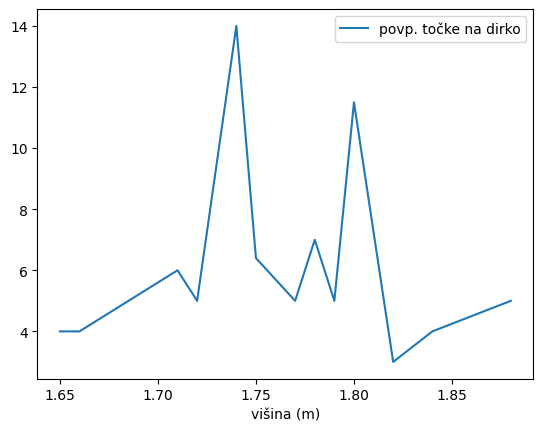

In [12]:
podtabela1  = VOZNIKI_DODATNO[["višina (m)", "povp. točke na dirko"]].copy()
podtabela1.groupby(by="višina (m)").agg({"povp. točke na dirko":"mean"}).plot()

So najboljši dirkači bolj uspešni na kvalifikacijah za dirko, kjer se določi njihovo štartno mesto, ali na dirki sami? Da dobimo odgovor bomo primerjali povprečno štartno in končno mesto.<br>
Ker je spodnji graf nekoliko zamaknjen v desno, to pomeni, da so v dirkači povprečju med dirko pridobili mesta. To ni presenetljivo, saj so tu analizirani podatki samo najuspešnejših dirkačev, za katere je uspešnost na dirki pričakovana.

<Axes: xlabel='povp. štartno mesto'>

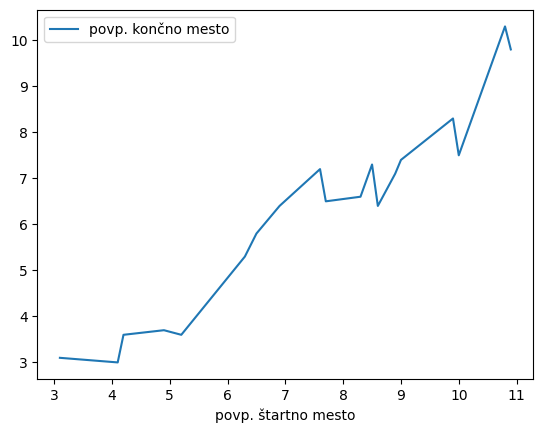

In [13]:
VOZNIKI_DODATNO[["povp. štartno mesto", "povp. končno mesto"]].groupby(by="povp. štartno mesto").agg({"povp. končno mesto":"mean"}).plot()

Prejšnjo ugotovitev potrjuje tudi spodnji graf, ki nam pokaže, da le en dirkač v povprečju skozi dirko ni pridobil mest.

<Axes: xlabel='pridobil mesta'>

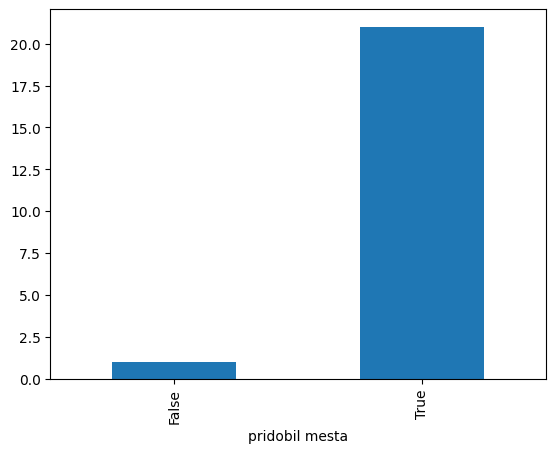

In [14]:
podtabela3 = VOZNIKI_DODATNO[["povp. štartno mesto", "povp. končno mesto"]].copy()
pridobil_mesta = podtabela3["povp. štartno mesto"] > podtabela3["povp. končno mesto"]
podtabela3["pridobil mesta"] = pridobil_mesta
podtabela3.groupby("pridobil mesta").size().plot.bar()

Dirkač, ki v povprečju skozi dirko ni pridobil mest je Ayrton Senna, ki pa mest niti ni izgubil. V povprečju je namreč dirko zaključil na istem mestu kot jo je začel.

In [15]:
filter_ni_pridobil = (podtabela3["pridobil mesta"] == False)
podtabela3[filter_ni_pridobil] 

,povp. štartno mesto,povp. končno mesto,pridobil mesta
ime,,,
Ayrton Senna,3.1,3.1,False


## Zaključek<br>
Formulo 1 spremljam že nekaj let, zato nad večino podatkov nisem bil presenečen, a so me kljub temu nekateri presenetili. Vedel sem, da so vozniki kot so Lewis Hamilton, Max Verstappen in Michael Schumacher eni izmed najboljših vseh časov, vendar me je podatek, da so v karieri zmagali vsako tretjo tekmo neverjeten, sploh, če upoštevamo število nastopov, ki jih imajo.<br>
To, da so razlike med najboljšimi in najslabšimi ogromne je razumljivo, saj si najboljši vozniki s svojimi dobrimi predstavami zagotovijo svoje mesto v Formuli 1 za dlje časa, medtem, ko slabše voznike ekipe hitro zamenjajo. Ker vsako sezono v Formuli 1 tekmuje le 20 voznikov, so bili ne glede na vse tudi "najslabši" vozniki na neki točki med dvajsetimi najboljšimi vozniki na svetu. Morda pa so ravno zato dosežki najboljših še toliko bolj navdušujoči.